In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
"""# Set base directory
base_dir = 'DataPaper'
user_ids = [f'user_{i}' for i in range(1, 23)]
file_types = ['user_info','actigraph', 'activity', 'questionnaire', 'RR', 'saliva', 'sleep']

# Dictionary to collect user DataFrames
combined_dfs = {file: [] for file in file_types}

# Read and collect
for user in user_ids:
    for file in file_types:
        file_path = os.path.join(base_dir, user, f"{file}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['user'] = user
            combined_dfs[file].append(df)

# Save each combined file to CSV
for file, dfs in combined_dfs.items():
    if dfs:  # Ensure there's something to save
        df_combined = pd.concat(dfs, ignore_index=True)
        df_combined.to_csv(f'all_{file}.csv', index=False)"""

'# Set base directory\nbase_dir = \'DataPaper\'\nuser_ids = [f\'user_{i}\' for i in range(1, 23)]\nfile_types = [\'user_info\',\'actigraph\', \'activity\', \'questionnaire\', \'RR\', \'saliva\', \'sleep\']\n\n# Dictionary to collect user DataFrames\ncombined_dfs = {file: [] for file in file_types}\n\n# Read and collect\nfor user in user_ids:\n    for file in file_types:\n        file_path = os.path.join(base_dir, user, f"{file}.csv")\n        if os.path.exists(file_path):\n            df = pd.read_csv(file_path)\n            df[\'user\'] = user\n            combined_dfs[file].append(df)\n\n# Save each combined file to CSV\nfor file, dfs in combined_dfs.items():\n    if dfs:  # Ensure there\'s something to save\n        df_combined = pd.concat(dfs, ignore_index=True)\n        df_combined.to_csv(f\'all_{file}.csv\', index=False)'

In [3]:
actigraph = pd.read_csv('cleaned_data/all_actigraph.csv').drop('Unnamed: 0',axis=1)
activity = pd.read_csv('cleaned_data/all_activity.csv').drop('Unnamed: 0',axis=1)
rr = pd.read_csv('cleaned_data/all_RR.csv').drop('Unnamed: 0',axis=1)
saliva = pd.read_csv('cleaned_data/all_saliva.csv').drop('Unnamed: 0',axis=1)
sleep = pd.read_csv('cleaned_data/all_sleep.csv').drop('Unnamed: 0',axis=1)
user_info = pd.read_csv('cleaned_data/all_user_info.csv').drop('Unnamed: 0',axis=1)

user_info['BMI'] = user_info['Weight'] / ((user_info['Height'] / 100) ** 2)
user_info['BMI'] = user_info['BMI'].round(2)

#user_info[['Gender','Age','user','BMI']].to_csv('all_user_info.csv', index=False)


In [4]:
#actigraph[actigraph['user'] != 'user_18'].to_csv('cleaned_data/all_actigraph.csv')

#rr[rr['user'] != 'user_18'].to_csv('cleaned_data/all_RR.csv')

#saliva[saliva['user'] != 'user_18'].to_csv('cleaned_data/all_saliva.csv')

user_info[user_info['user'] != 'user_18'].to_csv('cleaned_data/relevent_user_info.csv')


In [5]:
actigraph

,Axis1,Axis2,Axis3,Steps,HR,Inclinometer Off,Inclinometer Standing,Inclinometer Sitting,Inclinometer Lying,Vector Magnitude,day,time,user
0,0,0,0,0,68.0,0,1,0,0,0.00,1,10:10:22,user_1
1,11,4,7,1,68.0,0,1,0,0,13.64,1,10:10:23,user_1
2,0,21,10,0,68.0,0,0,1,0,23.26,1,10:10:24,user_1
3,0,1,24,0,68.0,0,0,1,0,24.02,1,10:10:25,user_1
4,34,14,63,1,154.0,0,1,0,0,72.95,1,10:10:26,user_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396762,90,115,80,0,72.0,0,1,0,0,166.51,2,08:38:51,user_22
1396763,33,49,28,1,72.0,0,1,0,0,65.38,2,08:38:52,user_22
1396764,32,25,34,0,72.0,0,1,0,0,52.96,2,08:38:53,user_22
1396765,59,28,188,1,72.0,0,1,0,0,199.02,2,08:38:54,user_22


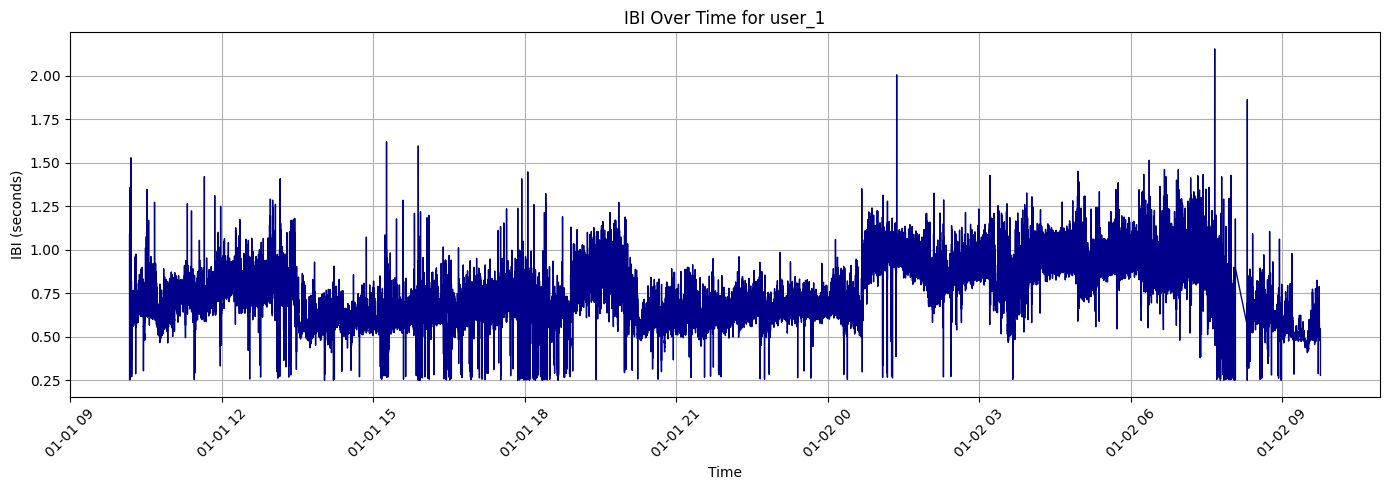

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for one user (e.g., 'user_1')
rr_user = rr[rr['user'] == 'user_1'].copy()

# Create full timestamp from day and time
rr_user['timestamp'] = pd.to_datetime('2025-01-01') + pd.to_timedelta(rr_user['day'] - 1, unit='D') + pd.to_timedelta(rr_user['time'])

# Sort by timestamp
rr_user = rr_user.sort_values(by='timestamp')
rr_user_filtered = rr_user[rr_user['ibi_s'] <= 2.5]

# Plot
plt.figure(figsize=(14, 5))
plt.plot(rr_user_filtered['timestamp'], rr_user_filtered['ibi_s'], color='darkblue', linewidth=1)

plt.xlabel('Time')
plt.ylabel('IBI (seconds)')
plt.title('IBI Over Time for user_1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [7]:
rr_user

,ibi_s,day,time,user,timestamp
0,0.258,1,10:10:17,user_1,2025-01-01 10:10:17
1,0.319,1,10:10:18,user_1,2025-01-01 10:10:18
2,0.266,1,10:10:18,user_1,2025-01-01 10:10:18
3,0.401,1,10:10:18,user_1,2025-01-01 10:10:18
4,1.089,1,10:10:19,user_1,2025-01-01 10:10:19
...,...,...,...,...,...
91854,0.465,2,09:45:25,user_1,2025-01-02 09:45:25
91853,0.470,2,09:45:25,user_1,2025-01-02 09:45:25
91855,0.463,2,09:45:25,user_1,2025-01-02 09:45:25
91856,0.457,2,09:45:26,user_1,2025-01-02 09:45:26


In [8]:
saliva

,SAMPLES,Cortisol NORM,Melatonin NORM,user
0,before sleep,0.034137,1.738385e-08,user_1
1,wake up,0.077939,6.747893e-09,user_1
2,before sleep,0.021186,1.676342e-08,user_2
3,wake up,0.261252,2.853905e-08,user_2
4,before sleep,0.012142,5.714439e-09,user_3
5,wake up,0.043799,3.603324e-09,user_3
6,before sleep,0.023772,2.149747e-08,user_4
7,wake up,0.041724,8.055610e-09,user_4
8,before sleep,0.022310,2.396239e-08,user_5
9,wake up,0.089516,1.096777e-08,user_5


17 out of 20 users showed an increase in cortisol after waking up.


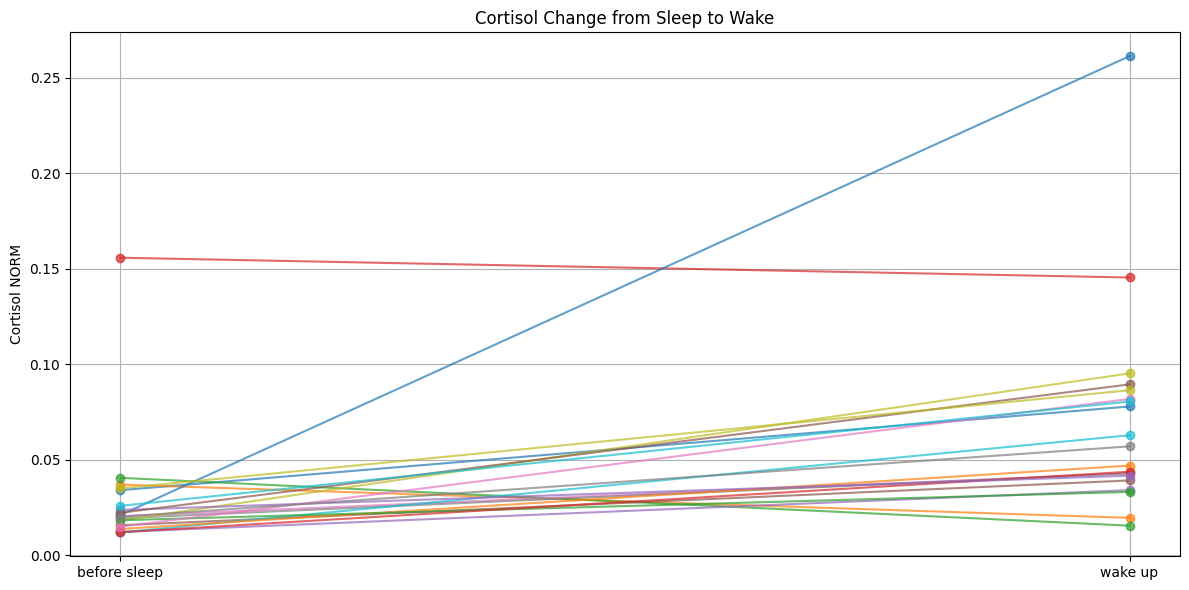

In [9]:
import pandas as pd

# Assuming `saliva` is already your DataFrame
saliva_cortisol = saliva.pivot(index='user', columns='SAMPLES', values='Cortisol NORM')
saliva_cortisol['cortisol_diff'] = saliva_cortisol['wake up'] - saliva_cortisol['before sleep']
saliva_cortisol['increase'] = saliva_cortisol['cortisol_diff'] > 0

saliva_cortisol = saliva_cortisol.reset_index()
saliva_cortisol[['user', 'before sleep', 'wake up', 'cortisol_diff', 'increase']]

expected_count = saliva_cortisol['increase'].sum()
total_users = saliva_cortisol.shape[0]

print(f"{expected_count} out of {total_users} users showed an increase in cortisol after waking up.")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i, row in saliva_cortisol.iterrows():
    plt.plot(['before sleep', 'wake up'], [row['before sleep'], row['wake up']], 
             marker='o', label=row['user'], alpha=0.7)

plt.title('Cortisol Change from Sleep to Wake')
plt.ylabel('Cortisol NORM')
plt.grid(True)
plt.xticks(['before sleep', 'wake up'])
plt.tight_layout()
plt.show()

12 out of 20 users showed a decrease in melatonin after waking up.


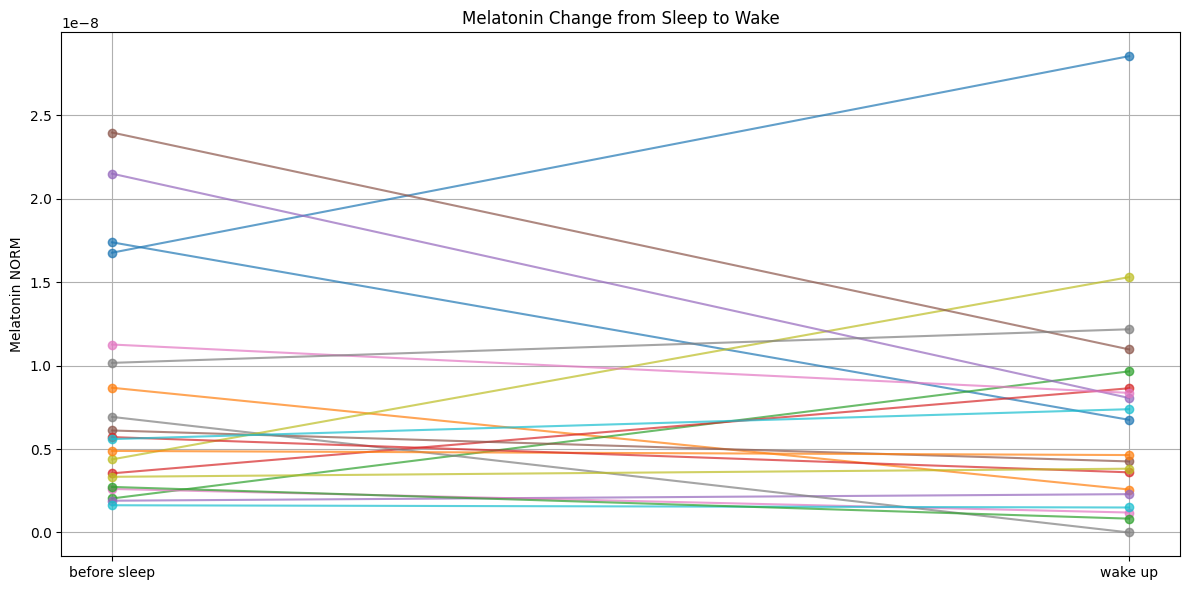

In [10]:
# Pivot for melatonin
saliva_melatonin = saliva.pivot(index='user', columns='SAMPLES', values='Melatonin NORM')

# Calculate difference
saliva_melatonin['melatonin_diff'] = saliva_melatonin['wake up'] - saliva_melatonin['before sleep']
saliva_melatonin['decrease'] = saliva_melatonin['melatonin_diff'] < 0

# Reset index for display
saliva_melatonin = saliva_melatonin.reset_index()

# Show relevant columns
saliva_melatonin[['user', 'before sleep', 'wake up', 'melatonin_diff', 'decrease']]

expected_melatonin = saliva_melatonin['decrease'].sum()
total_users = saliva_melatonin.shape[0]

print(f"{expected_melatonin} out of {total_users} users showed a decrease in melatonin after waking up.")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i, row in saliva_melatonin.iterrows():
    plt.plot(['before sleep', 'wake up'], [row['before sleep'], row['wake up']],
             marker='o', label=row['user'], alpha=0.7)

plt.title('Melatonin Change from Sleep to Wake')
plt.ylabel('Melatonin NORM')
plt.grid(True)
plt.xticks(['before sleep', 'wake up'])
plt.tight_layout()
plt.show()

In [45]:
from scipy.ndimage import gaussian_filter1d
def apply_gaussian_filter(df, column='Vector Magnitude', sigma=150):
    """
    Applies a Gaussian filter to smooth the specified column in the DataFrame.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame with the data.
        column (str): Name of the column to smooth.
        sigma (float): Standard deviation for Gaussian kernel.
        
    Returns:
        pd.DataFrame: Copy of original DataFrame with a new column
                      '<column>_smoothed' containing the smoothed data.
    """
    df_smoothed = df.copy()
    df_smoothed[column + '_smoothed'] = gaussian_filter1d(df[column].values, sigma=sigma)
    return df_smoothed

In [46]:
actigraph = pd.read_csv('cleaned_data/all_actigraph.csv')[['Vector Magnitude', 'time', 'user']]

actigraph_smooth = apply_gaussian_filter(actigraph)

In [47]:
# actigraph_smooth.to_csv('cleaned_data/acc.csv')